Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Отлично, что доверительный интервал и риск убытков посчитаны верно.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Привет, Артем. Приятно познакомиться и спасибо за ревью. Замечания учел, поправки сделал, по одному из замечаний у меня есть вопрос, он рядом с самим замечанием.
</div>

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в доработке.

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Привет еще раз. Думаю, что теперь все правильно.
</div>

### <font color='orange'>Общее впечатление (ревью 3)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* С выбором региона согласен.
* Удачи в дальнейшем обучении и следующих работах!

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

## Загрузка и подготовка данных

In [2]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Данные загружены корректно, пропусков нет.

Проверим данные на наличие зависимостей и распределение целевого признака:

In [6]:
df_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


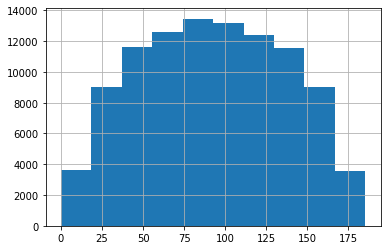

In [7]:
df_0['product'].hist()

In [8]:
df_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


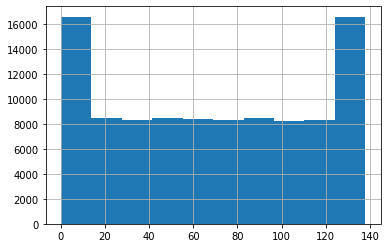

In [9]:
df_1['product'].hist()

In [10]:
df_2.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


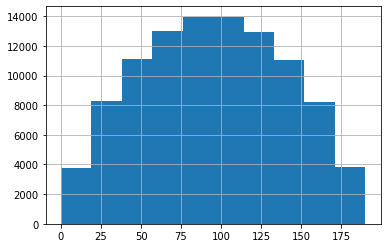

In [11]:
df_2['product'].hist()

Распределения отличаются, при этом данные второго региона выглядят странно, но, т.к. данные получены синтетическим путем, и задание не подразумевает масштабных преобразований исходных данных, будем работать с тем, что есть.

In [12]:
df_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Разделим датасеты на фичи и целевые признаки, при этом в данных содержится информация об id исследованой точки, не несущая смысловой нагрузки для построения моделей, отбросим эту информацию:

In [13]:
target_0 = df_0['product']
features_0 = df_0.drop(['product', 'id'], axis=1)
print(target_0.shape, features_0.shape)

(100000,) (100000, 3)


In [14]:
target_1 = df_1['product']
features_1 = df_1.drop(['product', 'id'], axis=1)
print(target_1.shape, features_1.shape)

(100000,) (100000, 3)


In [15]:
target_2 = df_2['product']
features_2 = df_2.drop(['product', 'id'], axis=1)
print(target_2.shape, features_2.shape)

(100000,) (100000, 3)


Данные загружены, проверены и подготовлены для использования в машинном обучении.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно, первичный осмотр проведен. Согласен, что колонка id нам не нужна.
</div>

## Обучение и проверка модели

### Регион №0

Разделяем набор данных на обучающую и тестовую выборки в пропорции 75/25%

In [16]:
train_features_0, test_features_0, train_target_0, test_target_0 = train_test_split(
features_0, target_0, test_size=0.25, random_state=12345)

Модель - линейная регрессия

In [17]:
model_0 = LinearRegression()
model_0.fit(train_features_0, train_target_0)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Предсказания модели на тестовой выборке сохраняем для дальнейшего использования

In [18]:
predict_0 = model_0.predict(test_features_0)

Посчитаем RMSE модели:

In [19]:
mse_0 = mean_squared_error(test_target_0, predict_0)

In [20]:
mse_0**0.5

37.5794217150813

In [21]:
pd.Series(predict_0).mean()

92.59256778438038

### Регион №1

Аналогично построим и проанализируем модель для второго региона

In [22]:
train_features_1, test_features_1, train_target_1, test_target_1 = train_test_split(
features_1, target_1, test_size=0.25, random_state=12345)

In [23]:
model_1 = LinearRegression()
model_1.fit(train_features_1, train_target_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
predict_1 = model_1.predict(test_features_1)

In [25]:
mse_1 = mean_squared_error(test_target_1, predict_1)

In [26]:
mse_1**0.5

0.893099286775616

In [27]:
pd.Series(predict_1).mean()

68.728546895446

### Регион №2

Аналогично построим и проанализируем модель для третьего региона

In [28]:
train_features_2, test_features_2, train_target_2, test_target_2 = train_test_split(
features_2, target_2, test_size=0.25, random_state=12345)

In [29]:
model_2 = LinearRegression()
model_2.fit(train_features_2, train_target_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
predict_2 = model_2.predict(test_features_2)

In [31]:
mse_2 = mean_squared_error(test_target_2, predict_2)

In [32]:
mse_2**0.5

40.02970873393434

In [33]:
pd.Series(predict_2).mean()

94.96504596800489

### Вывод

Модели построены, предсказания получены, результаты соответствуют ранее определенным различиям второго и первого с третьим регионов.

<div class="alert alert-block alert-success">
<b>Успех:</b> Модели обучены корректно.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> На протяжении всего проекта происходит работа с 3мя одинаковыми таблицами. В связи с этим можно было использовать функции и/или циклы, чтобы избежать копирования кода.
<br> Зачем его нужно избегать? Потому что очень часто оно приводит к ошибкам (например, забыл поменять одну из переменных). Впоследствии такие ошибки очень трудно найти.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Совет учту на будущее.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> ОК.
</div>

## Подготовка к расчёту прибыли

Зададим константы для расчета экономических показателей, budget - бюджет на разработку месторождений в регионе, product_price - стоимость единицы продукции(1000 баррелей), product_amount - необходимые запасы нефти в регионе для обеспечения безубыточной добычи.

In [34]:
BUDGET = 10000000000
PRODUCT_PRICE = 450000

<div class="alert alert-block alert-info">

<b>Совет: </b> В названиях константных переменных лучше использовать только БОЛЬШИЕ буквы. Это соглашение между программистами: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#id29 .
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> ОК.
</div>

In [35]:
product_amount = BUDGET / PRODUCT_PRICE
product_amount

22222.222222222223

<div class="alert alert-block alert-success">
<b>Успех:</b> Точка безубыточности найдена верно!
</div>

Средний объем запасов в регионе должен быть выше данной величины. Посчитаем запасы в регионах:

In [36]:
pd.Series(predict_0).sample(n=200, random_state=12345).sum()

18066.75717577053

In [37]:
pd.Series(predict_1).sample(n=200, random_state=12345).sum()

14733.595879158143

In [38]:
pd.Series(predict_2).sample(n=200, random_state=12345).sum()

18741.229826615017

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Сравнивать нужно со случайным набором скважин, а не с лучшими.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Изменил на случайные скважины.
</div>
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Только не понимаю почему случайные, ведь в любом случае есть данные, и есть возможность выбрать лучшие. Ну и со случайными вывод меняется на противоположный, ни одна скважина не дотягивает до безубыточного объема, что в дальнейшем опровергается бутсртапом. Поясни этот момент, пожалуйста.
</div>

<div class="alert alert-block alert-info">
<b>Совет (ревью 2): </b> Не одна не дотягивает -> значит нужно применять ML. Так как иначе можно было выбирать скважины наугад.
    
Если ты будешь дальше исследовать регион, то не сможешь измерить реальный объем, у тебя будут только признаки, так что выбрать топ-200 скважин во время реальной разработки никак нельзя.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Понял, спасибо. В задании такая логика не прослеживается, вот и возникли непонятки.
</div>

Все три региона на первый взгляд обладают <b>НЕ</b>достаточным количеством запасов нефти для обеспечения безубыточной разработки месторождений. Поэтому нужно проводить анализ с использованием машинного обучения.

## Расчёт прибыли и рисков 

Для расчета экономических перспектив разработки месторождений в регионах напишем функции расчета прибыли, 95% доверительного интервала для средней прибыли и вероятности понесения убытков.

In [39]:
def profit(sample):
    """Функция расчета прибыли от добычи нефти по предсказаниям модели"""
    return (sample.sum() * PRODUCT_PRICE - BUDGET)

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Для выбора 200 лучших скважин нужно использовать предсказанные значения. А вот для подсчета прибыли должны использоваться настоящие значения соответствующих ячеек.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Поправил.
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка (ревью 2):</b> Не совсем. Теперь ты выбираешь топ-200 по реальным и считаешь прибыль по реальным, а нужно выбрать топ-200 по предсказанным и посчитать прибыль по их реальным значениями.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Теперь вроде бы правильно, беру топ-200 предсказаний, по их индексам отбираю истинные значения (индексы точек совпадают), по ним уже считается прибыль.
</div>

In [40]:
state = RandomState(12345)
def bootstrap(predicted, true_product, count):
    """Функция расчета средней прибыли с 95% доверительным интервалом и вероятности убытков с помощью техники bootstrap"""
    values = []
    true_product = pd.Series(true_product).reset_index(drop=True)
    for i in range(1000):
        predicted_subsample = pd.Series(predicted).sample(
            n=500, replace=True, random_state=state).sort_values(ascending=False).head(count)
        true_subsample = true_product[predicted_subsample.index]
        values.append(profit(true_subsample))
    values = pd.Series(values)
    mean = values.mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    print("Средняя прибыль, млн.руб.:", mean / 1000000)
    print("95% доверительный интервал средней прибыли, млн.руб.: от", lower / 1000000, "до", upper / 1000000)
    print("Вероятность убытков:", (values < 0).mean())

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что для нахождения доверительного интервала использовался метод квантилей!
</div>

<div class="alert alert-block alert-info">

<b>Совет: </b> Риск можно было найти чуть проще: `(values < 0).mean()`, если объект типа pandas Series или numpy array.
</div>

In [41]:
bootstrap(predict_0, test_target_0, 200)

Средняя прибыль, млн.руб.: 396.16498480237107
95% доверительный интервал средней прибыли, млн.руб.: от -111.21554589049525 до 909.7669415534225
Вероятность убытков: 0.069


In [42]:
bootstrap(predict_1, test_target_1, 200)

Средняя прибыль, млн.руб.: 461.15581727723975
95% доверительный интервал средней прибыли, млн.руб.: от 78.05081075174171 до 862.9520602637235
Вероятность убытков: 0.007


In [43]:
bootstrap(predict_2, test_target_2, 200)

Средняя прибыль, млн.руб.: 392.9504751706045
95% доверительный интервал средней прибыли, млн.руб.: от -112.22762537857565 до 934.5629145511635
Вероятность убытков: 0.065


На основании проведенных расчетов можно выделить регион №1 (отсчет с 0) как наиболее перспективный по совокупности величины предсказанной средней прибыли и вероятности убытков.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован